<div align="center">
    <div class="">
    <h1>
        <strong>FINAL PROJECT</strong>
    </h1>
</div>
</div>
<div align="center">
    <p>
        Iman Satyo Adi
    </p>
</div>

## __1. Pengenalan__

##### data yang di gunakan
    - data House Prices
##### jumlah data
    - 80 columns
##### sumber
    - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/ 


## __2. Import Package__

In [74]:
# import package
import numpy as np
import pandas as pd

# visualisasi
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot']) # ubah style matplotlib nya

# sklearn untuk model machine learning
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# polynomial regression model perlu ini
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, LabelEncoder

# evaluasi keakuratan model
# belum ada tambahan package

# profiling
import pandas_profiling
# split data
from sklearn.model_selection import train_test_split


import pickle

## __3. Data Loading and Exploratory Data Analysis__

In [75]:
df_train = pd.read_csv("dataset/train.csv")
df_test = pd.read_csv("dataset/test.csv")

report = df_train.profile_report(title="House Prices")

display(df_train)
display(df_test)

print(df_train.shape)
print(df_test.shape)

display(df_train.info())
display(df_test.info())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


(1460, 81)
(1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null  

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

None

In [76]:
print(df_train.columns)
print(df_test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [77]:
print(df_train.isnull().sum().sum())
print(df_test.isnull().sum().sum())

6965
7000


In [78]:
df_house = df_train[['MSSubClass','LotArea','YrSold', 'SalePrice']]
features = df_train[['MSSubClass','LotArea','YrSold']]
target = df_train['SalePrice']
features.info()
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MSSubClass  1460 non-null   int64
 1   LotArea     1460 non-null   int64
 2   YrSold      1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [79]:
df_house

,MSSubClass,LotArea,YrSold,SalePrice
0,60,8450,2008,208500
1,20,9600,2007,181500
2,60,11250,2008,223500
3,70,9550,2006,140000
4,60,14260,2008,250000
...,...,...,...,...
1455,60,7917,2007,175000
1456,20,13175,2010,210000
1457,70,9042,2010,266500
1458,20,9717,2010,142125


In [80]:
# df_train.profile_report(title="Housing Data", minimal=True)

## __4. Data Preprocessing__

In [81]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [82]:
features = df_train[['MSSubClass','LotArea','YrSold']]
target = df_train['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1022, 3) (438, 3)
(1022,) (438,)


In [83]:
scaler = MinMaxScaler()
le = LabelEncoder() 

In [84]:
scaler.fit_transform(features)

array([[0.23529412, 0.0334198 , 0.5       ],
       [0.        , 0.03879502, 0.25      ],
       [0.23529412, 0.04650728, 0.5       ],
       ...,
       [0.29411765, 0.03618687, 1.        ],
       [0.        , 0.03934189, 1.        ],
       [0.        , 0.04037019, 0.5       ]])

# __5. Pendefinisian Model__

In [85]:
df_house = df_train[['MSSubClass','LotArea','YrSold', 'SalePrice']]
features = df_train[['MSSubClass','LotArea','YrSold']]
target = df_train['SalePrice']
features.info()
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MSSubClass  1460 non-null   int64
 1   LotArea     1460 non-null   int64
 2   YrSold      1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [86]:
df_house

,MSSubClass,LotArea,YrSold,SalePrice
0,60,8450,2008,208500
1,20,9600,2007,181500
2,60,11250,2008,223500
3,70,9550,2006,140000
4,60,14260,2008,250000
...,...,...,...,...
1455,60,7917,2007,175000
1456,20,13175,2010,210000
1457,70,9042,2010,266500
1458,20,9717,2010,142125


## a) Logistic Regression

In [87]:
model = LogisticRegression(solver="liblinear", random_state=0).fit(x, y)

[[60]
 [20]
 [60]
 ...
 [70]
 [20]
 [20]]


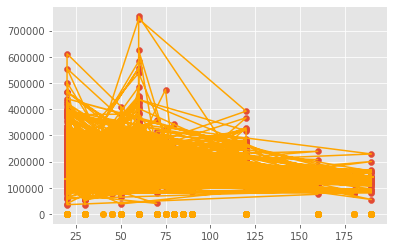

In [88]:
x = np.array(df_train['MSSubClass']).reshape((-1, 1))
y = np.array(target)
y_result = model.predict(x)

print(x)
plt.scatter(x, y)
plt.plot(x, y.T, color="orange")
plt.scatter(x, model.predict(x), color="orange", marker="+")
plt.scatter(x, model.predict_proba(x).T[1], color="orange")

[[ 8450]
 [ 9600]
 [11250]
 ...
 [ 9042]
 [ 9717]
 [ 9937]]


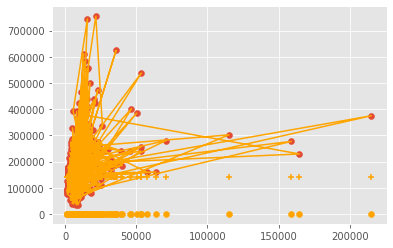

In [89]:
x = np.array(df_train['LotArea']).reshape((-1, 1))
y = np.array(target)
y_result = model.predict(x)

print(x)
plt.scatter(x, y)
plt.plot(x, y.T, color="orange")
plt.scatter(x, model.predict(x), color="orange", marker="+")
plt.scatter(x, model.predict_proba(x).T[1], color="orange")

[[2008]
 [2007]
 [2008]
 ...
 [2010]
 [2010]
 [2008]]


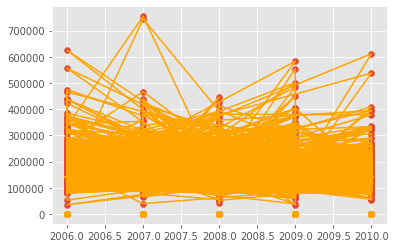

In [90]:
x = np.array(df_train['YrSold']).reshape((-1, 1))
y = np.array(target)
y_result = model.predict(x)

print(x)
plt.scatter(x, y)
plt.plot(x, y.T, color="orange")
plt.scatter(x, model.predict(x), color="orange", marker="+")
plt.scatter(x, model.predict_proba(x).T[1], color="orange")

In [91]:
x_train, x_test, y_train, y_test = train_test_split(features, target)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1095, 3) (365, 3)
(1095,) (365,)


In [92]:
model = LinearRegression().fit(x_train, y_train)
model.score(x_test, y_test)

0.07331859922402162

## b) Linear Regression

In [93]:
x_train, x_test, y_train, y_test = train_test_split(features, target)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1095, 3) (365, 3)
(1095,) (365,)


In [94]:
model = LinearRegression().fit(x_train, y_train)

In [95]:
model.predict([[20, 10000, 2015]])

C:\Users\imans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([167642.01929151])

In [96]:
model.score(x_test, y_test)

0.042983995526646

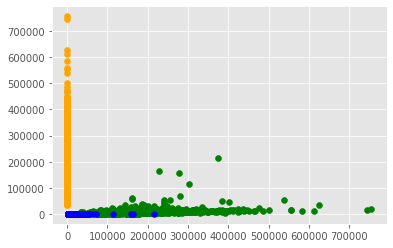

In [97]:
plt.scatter(df_house.MSSubClass, df_house.SalePrice, color="orange")
plt.scatter(df_house.SalePrice, df_house.LotArea, color="green")
plt.scatter(df_house.LotArea, df_house.YrSold, color="blue")

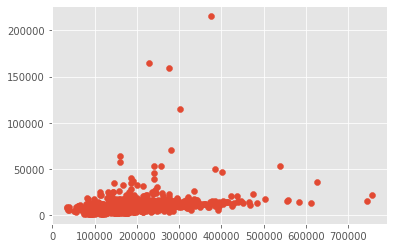

In [98]:
plt.scatter(df_house.SalePrice, df_house.LotArea)

## c) Polynomial Regression

In [99]:
d = 4
transformer = PolynomialFeatures(degree=d, include_bias=False).fit(features)
fitur_poly = transformer.transform(features)

x_train, x_test, y_train, y_test = train_test_split(features, target)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

model_poly = LinearRegression().fit(x_train, y_train)
model_poly.score(x_test, y_test)

(1095, 3) (365, 3)
(1095,) (365,)


0.06564424627950527

## __6. Model Saving__

In [100]:
pickle.dump(model, open('model_houseprices.pkl', 'wb'))

## __7. Model Interference__

In [101]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']
temperature=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [102]:
le = LabelEncoder()
weather_en = le.fit_transform(weather)
weather_label = le.classes_
temperature_en = le.fit_transform(temperature)
temperature_label = le.classes_
play_en = le.fit_transform(play)
play_label = le.classes_

print("weather", weather_label)
print("temp", temperature_label)
print("play", play_label)

data = pd.DataFrame({"weather":weather_en, "temp":temperature_en, "play":play_en})
features = data[['weather', 'temp']]
target = data['play']

print(features)
print(target)

weather ['Overcast' 'Rainy' 'Sunny']
temp ['Cool' 'Hot' 'Mild']
play ['No' 'Yes']
    weather  temp
0         2     1
1         2     1
2         0     1
3         1     2
4         1     0
5         1     0
6         0     0
7         2     2
8         2     0
9         1     2
10        2     2
11        0     2
12        0     1
13        1     2
0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64


In [103]:
model.fit(features, target)

LinearRegression()

In [104]:
x_train, x_test, y_train, y_test = train_test_split(features, target)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(10, 2) (4, 2)
(10,) (4,)


In [105]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.17017104299805363
0.31074712199644594


In [106]:
df_train.profile_report(title="Housing Data", minimal=True)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]
